# Analisando as proposições de 2006 - 2010

### Os dados utilizados se encontram no portal de dados abertos da Câmara dos Deputados como sendo referentes aos anos de 2006 até 2010.

#### Link do portal: https://dadosabertos.camara.leg.br/swagger/api.html

#### Foi feito o download do arquivo no formato json disponibilizado no site, o mesmo foi processado por um script feito em python responsável por realizar o parsing e gerar um outro arquivo no formato csv.

#### Carregamento dos dados:

In [3]:
import pandas as pd

data = pd.read_csv('proposicoes/proposicoes_2006_2010.csv', encoding = 'utf8', header = 0)

## Visão Geral

In [4]:
data.shape

(12781, 56)

#### O arquivo contém, portanto, 12781 linhas com proposições e 56 colunas para cada uma. Três primeiras linhas:

In [3]:
data.head(3)

,COD_ORGAO_ORIGEM,NUM_LEGISLATURA_APRESEN,NUM_LEGISLATURA_LEI,NOM_PARTIDO_POLITICO,DAT_VETO_TOTAL,NOM_UF,DES_TIPO_PROPOSICAO,DES_COMPLETA,COD_TIPO_NORMA_JURIDICA_ORIGEM,SIG_UF,...,COD_TIPO_AUTOR_ORIGEM,NUM_SESSAO_LEGISLATIVA_LEI,DAT_FIM_LEGISLATURA_APRESEN,SIG_PARTIDO_POLITICO,IND_ATIVO_TIPO_PROPOSICAO,DAT_INICIO_LEGISLATURA_APRESEN,NUM_PROPOSICAO,COD_TIPO_SESSAO_LEGISLATIVA_LEI,NOM_PARLAMENTAR,DAT_FINAL_RECESSO_APRESEN
0,-1,53,-1,PARTIDO SOCIALISTA BRASILEIRO,NaN,PERNAMBUCO,PROJETO DE LEI,PROJETO DE LEI,-1,PE,...,TipoParlamentar_10000,-1.0,31-01-2011,PSB,1,01-02-2007,2.0,-1.0,CARLOS LAPA,01-08-2007
1,-1,53,-1,PARTIDO POPULAR SOCIALISTA,NaN,SANTA CATARINA,PROJETO DE LEI,PROJETO DE LEI,-1,SC,...,TipoParlamentar_10000,-1.0,31-01-2011,PPS,1,01-02-2007,180.0,-1.0,FERNANDO CORUJA,01-08-2007
2,-1,53,-1,PARTIDO DA REPÚBLICA,NaN,RIO DE JANEIRO,PROJETO DE LEI,PROJETO DE LEI,-1,RJ,...,TipoParlamentar_10000,-1.0,31-01-2011,PR,1,01-02-2007,48.0,-1.0,NEILTON MULIM,01-08-2007


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12781 entries, 0 to 12780
Data columns (total 56 columns):
COD_ORGAO_ORIGEM                         12781 non-null int64
NUM_LEGISLATURA_APRESEN                  12781 non-null int64
NUM_LEGISLATURA_LEI                      12781 non-null int64
NOM_PARTIDO_POLITICO                     8392 non-null object
DAT_VETO_TOTAL                           39 non-null object
NOM_UF                                   8462 non-null object
DES_TIPO_PROPOSICAO                      12781 non-null object
DES_COMPLETA                             12761 non-null object
COD_TIPO_NORMA_JURIDICA_ORIGEM           12781 non-null int64
SIG_UF                                   8462 non-null object
DAT_FIM_LEGISLATURA_LEI                  3544 non-null object
COD_PROPOSICAO_ORIGEM                    12748 non-null float64
DES_ATIVO_TIPO_PROPOSICAO                12781 non-null object
NOM_ORGAO                                4319 non-null object
DES_APELIDO_ORGAO   

In [5]:
data.isnull().any()

COD_ORGAO_ORIGEM                         False
NUM_LEGISLATURA_APRESEN                  False
NUM_LEGISLATURA_LEI                      False
NOM_PARTIDO_POLITICO                      True
DAT_VETO_TOTAL                            True
NOM_UF                                    True
DES_TIPO_PROPOSICAO                      False
DES_COMPLETA                              True
COD_TIPO_NORMA_JURIDICA_ORIGEM           False
SIG_UF                                    True
DAT_FIM_LEGISLATURA_LEI                   True
COD_PROPOSICAO_ORIGEM                     True
DES_ATIVO_TIPO_PROPOSICAO                False
NOM_ORGAO                                 True
DES_APELIDO_ORGAO                         True
DATAPRESENTACAOPROPOSICAO                False
DES_TIPO_AUTOR                           False
COD_SEXO                                  True
IND_ATIVO_ORGAO                          False
COD_TIPO_PARLAMENTAR                     False
DES_TIPO_NORMA_JURIDICA                   True
DES_TIPO_SESS

#### Das 56 totais, apenas 20 colunas estão completas, as outras possuem pelo menos uma linha sem informação.

### Veremos agora as relações entre as proposições e as informações de algumas colunas.

## Proposições x Estados

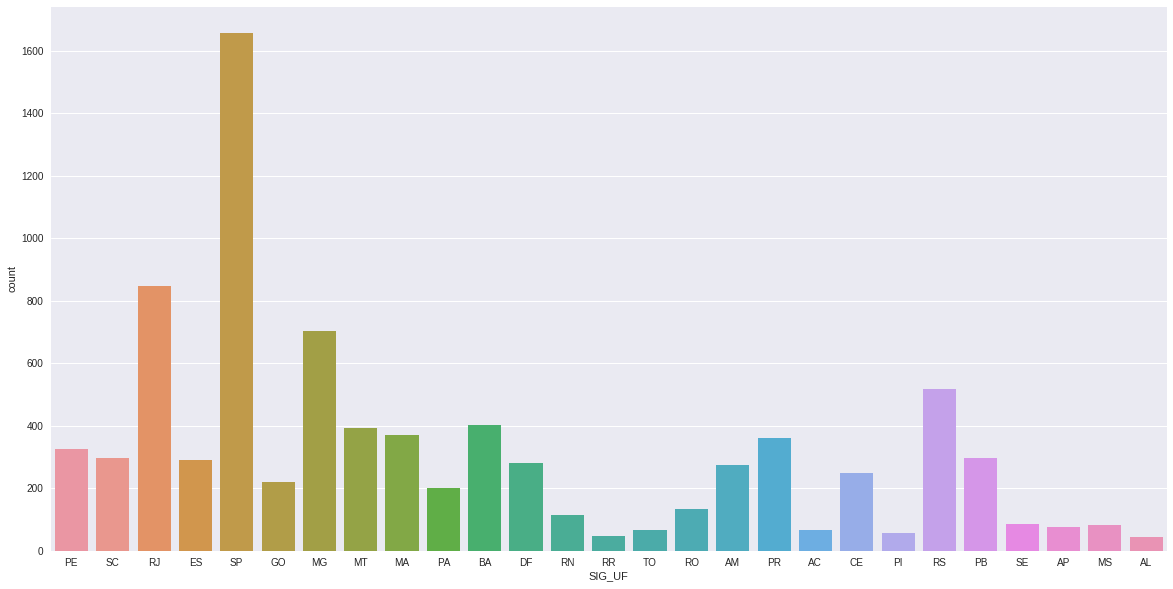

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_UF'], label = "Quantidade")

In [7]:
uf_list = data['SIG_UF'].tolist()
uf_counter = {}

for word in uf_list:
    if word in uf_counter:
        uf_counter[word] += 1
    else:
        uf_counter[word] = 1
        
popular_uf = sorted(uf_counter, key = uf_counter.get, reverse = True)
top_6 = popular_uf[:7]

for uf in top_6:
    if type(uf)!= float:
        print(uf + ': ' + str(uf_counter[uf]) + ' proposições')
    else:
        print('Sem a informação do estado: ' + str(uf_counter[uf]) + ' proposições')

Sem a informação do estado: 4319 proposições
SP: 1656 proposições
RJ: 847 proposições
MG: 703 proposições
RS: 517 proposições
BA: 401 proposições
MT: 392 proposições


#### Quantidade de proposições em cada estado:

In [8]:
uf_counter

{'PE': 327,
 'SC': 297,
 'RJ': 847,
 'ES': 291,
 'SP': 1656,
 'GO': 221,
 'MG': 703,
 'MT': 392,
 'MA': 371,
 'PA': 201,
 'BA': 401,
 'DF': 281,
 'RN': 115,
 'RR': 46,
 'TO': 68,
 'RO': 133,
 'AM': 275,
 'PR': 361,
 'AC': 65,
 'CE': 250,
 'PI': 57,
 'RS': 517,
 'PB': 296,
 'SE': 87,
 'AP': 76,
 'MS': 83,
 'AL': 45,
 nan: 4319}

## Proposições x Gênero

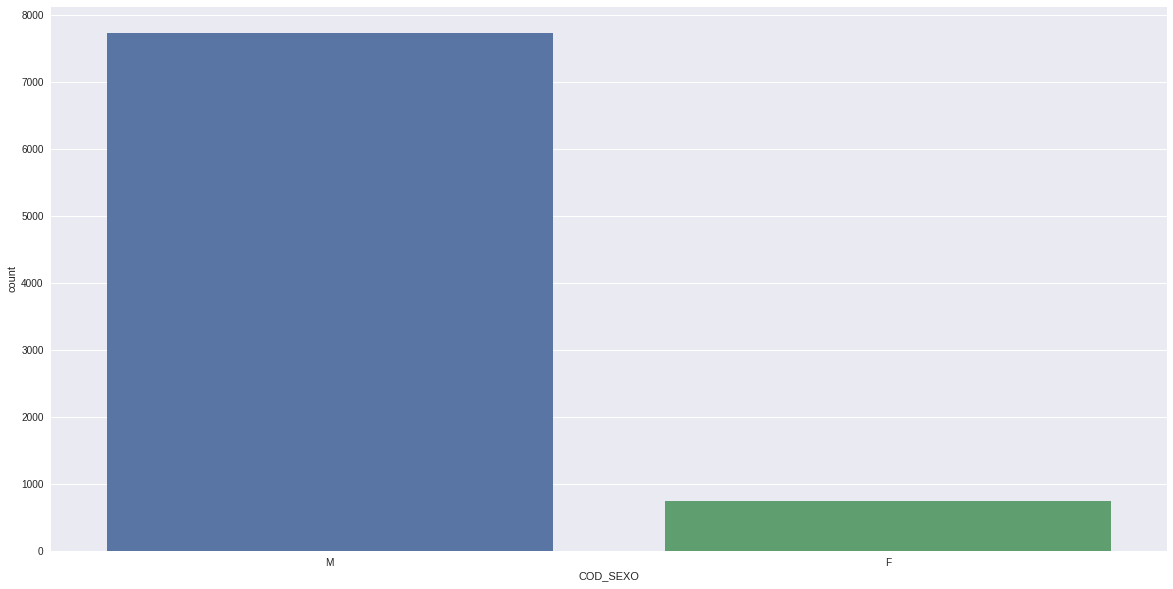

In [9]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['COD_SEXO'], label = "Quantidade")

In [10]:
gender_list = data['COD_SEXO'].tolist()
gender_counter = {}

for gender in gender_list:
    if gender in gender_counter:
        gender_counter[gender] += 1
    else:
        gender_counter[gender] = 1
        
gender_counter

{'M': 7726, 'F': 736, nan: 4319}

#### Grande maioria das proposições vieram de homens sendo que 4319 não informam o gênero da pessoa que propôs.

## Proposições x Temas

#### Ranking dos 6 temas mais frequentes nas proposições:

In [11]:
theme_list = data['AREAS_TEMATICAS_APRESENTACAO'].tolist()
theme_counter = {}

for theme in theme_list:
    if theme in theme_counter:
        theme_counter[theme] += 1
    else:
        theme_counter[theme] = 1
        
popular_themes = sorted(theme_counter, key = theme_counter.get, reverse = True)
top_6 = popular_themes[:7]

for theme in top_6:
    print(theme + ': ' + str(theme_counter[theme]) + ' proposições')

COMUNICAÇÕES: 2774 proposições
TRABALHO E EMPREGO: 603 proposições
EDUCAÇÃO: 598 proposições
VIAÇÃO E TRANSPORTES: 554 proposições
ADMINISTRAÇÃO PÚBLICA: 524 proposições
ORGANIZAÇÃO POLÍTICO-ADMINISTRATIVA DO ESTADO (UTILIZADO ATÉ A LEGISLATURA 53): 495 proposições
INDÚSTRIA, COMÉRCIO E DEFESA DO CONSUMIDOR (UTILIZADO ATÉ A LEGISLATURA 53): 439 proposições


#### Lista com todos os temas e a quantidade de proposições relacionadas a eles entre 2006 e 2010 se encontra em *temas06_10.txt* dentro do diretório *temas* neste mesmo repositório.

## Proposições x Tipo do Autor

#### Ranking dos tipos de autores do mais frequente ao menos frequente:

In [41]:
author_type_list = data['DES_TIPO_AUTOR'].tolist()
author_type_counter = {}

for author_type in author_type_list:
    if author_type in author_type_counter:
        author_type_counter[author_type] += 1
    else:
        author_type_counter[author_type] = 1
        
popular_author_type = sorted(author_type_counter, key = author_type_counter.get, reverse = True)

for author_type in popular_author_type:
    if author_type_counter[author_type] != 1:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposições')
    else:
        print(author_type + ': ' + str(author_type_counter[author_type]) + ' proposição')

DEPUTADO: 8461 proposições
COMISSÃO PERMANENTE: 2988 proposições
ÓRGÃO DO PODER LEGISLATIVO: 778 proposições
ÓRGÃO DO PODER EXECUTIVO: 382 proposições
ÓRGÃO DO PODER JUDICIÁRIO: 54 proposições
COMISSÃO MISTA PERMANENTE: 35 proposições
COMISSÃO PARLAMENTAR DE INQUÉRITO: 21 proposições
COMISSÃO DIRETORA: 21 proposições
COMISSÃO ESPECIAL: 18 proposições
MPU - MINISTÉRIO PÚBLICO DA UNIÃO: 13 proposições
COMISSÃO MISTA ESPECIAL: 6 proposições
CONSELHO: 2 proposições
SENADOR: 1 proposição
COMISSÃO PERMANENTE DO SENADO FEDERAL: 1 proposição


#### A grande maioria das proposições vieram diretamente dos deputados.

## Proposições x Ano

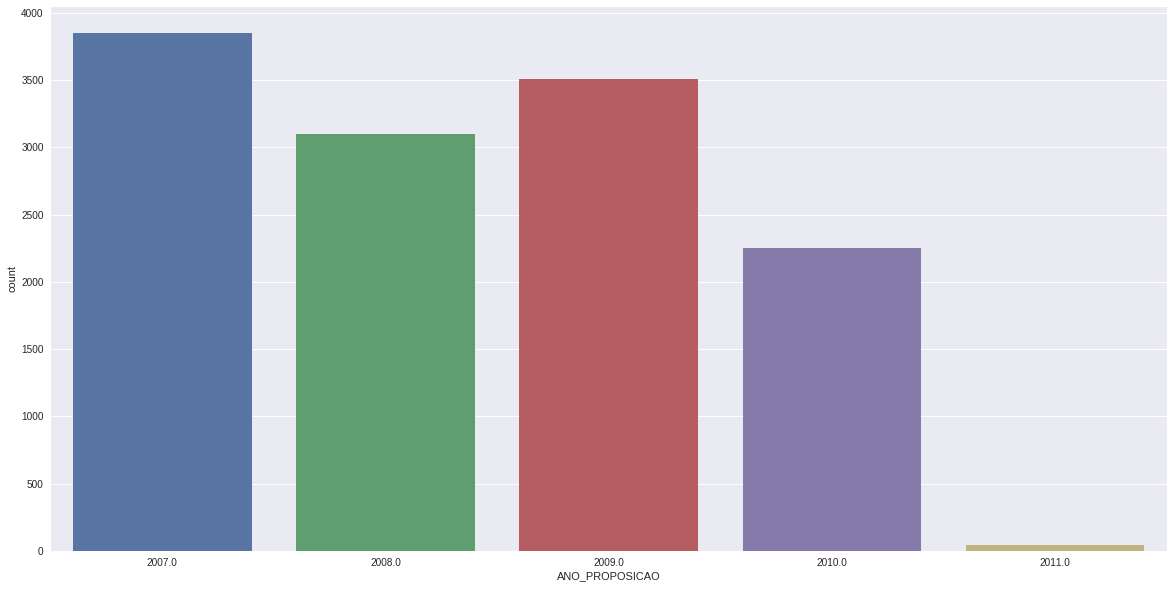

In [22]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['ANO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [42]:
year_list = data['ANO_PROPOSICAO'].tolist()
year_counter = {}

for year in year_list:
    if year in year_counter:
        year_counter[year] += 1
    else:
        year_counter[year] = 1
        
popular_year = sorted(year_counter, key = year_counter.get, reverse = True)

for year in popular_year:
    if year_counter[year] != 1:
        print(str(year) + ': ' + str(year_counter[year]) + ' proposições')

2007.0: 3849 proposições
2009.0: 3509 proposições
2008.0: 3096 proposições
2010.0: 2251 proposições
2011.0: 43 proposições


## Proposições x Região

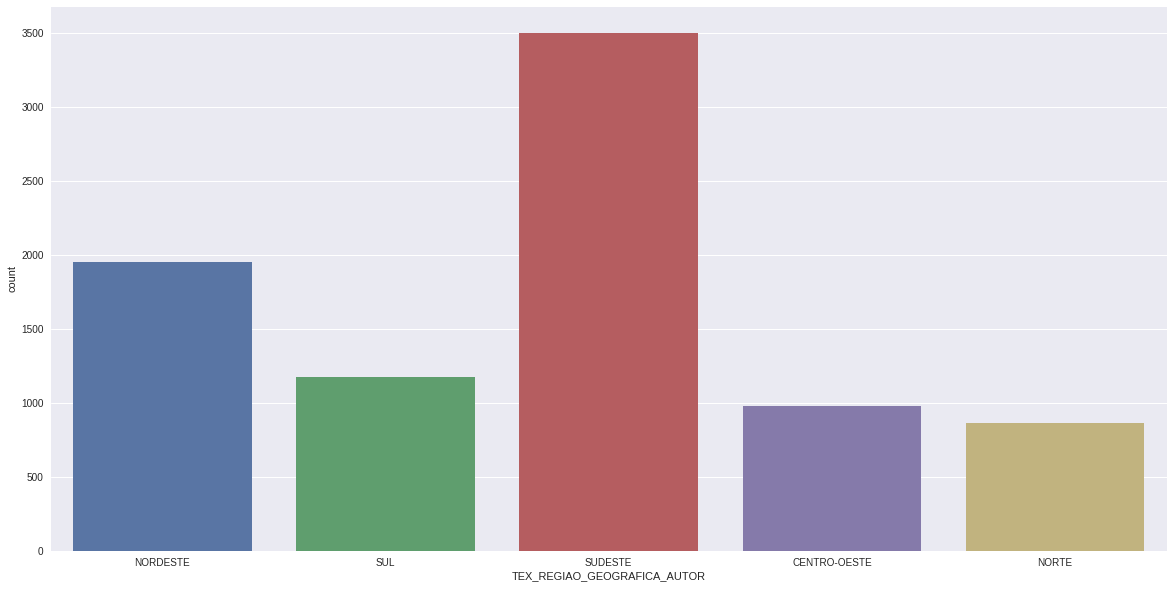

In [23]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['TEX_REGIAO_GEOGRAFICA_AUTOR'], label = "Quantidade")

#### Ranking:

In [44]:
region_list = data['TEX_REGIAO_GEOGRAFICA_AUTOR'].tolist()
region_counter = {}

for region in region_list:
    if region in region_counter:
        region_counter[region] += 1
    else:
        region_counter[region] = 1
        
popular_region = sorted(region_counter, key = region_counter.get, reverse = True)

for region in popular_region:
    if type(region) != float:
        print(region + ': ' + str(region_counter[region]) + ' proposições')
    else:
        print('Sem informação de região: ' + str(region_counter[region]) + ' proposições')

Sem informação de região: 4319 proposições
SUDESTE: 3497 proposições
NORDESTE: 1949 proposições
SUL: 1175 proposições
CENTRO-OESTE: 977 proposições
NORTE: 864 proposições


## Proposições x Tipos

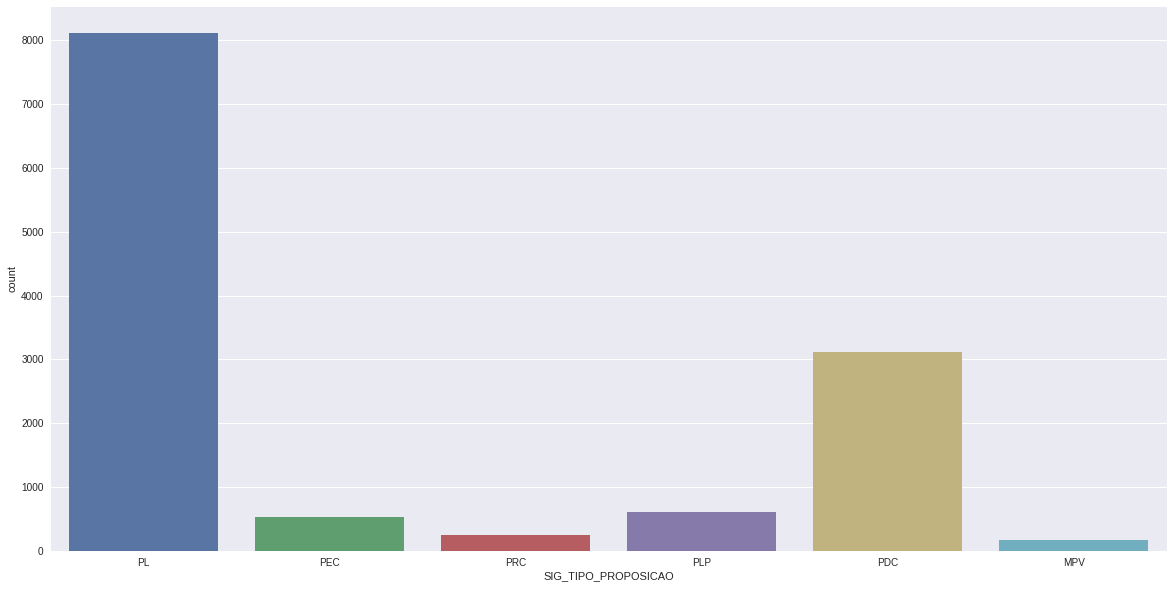

In [25]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_TIPO_PROPOSICAO'], label = "Quantidade")

#### Ranking:

In [46]:
proposition_list = data['SIG_TIPO_PROPOSICAO'].tolist()
proposition_counter = {}

for proposition in proposition_list:
    if proposition in proposition_counter:
        proposition_counter[proposition] += 1
    else:
        proposition_counter[proposition] = 1
        
popular_proposition = sorted(proposition_counter, key = proposition_counter.get, reverse = True)

for proposition in popular_proposition:
    print(proposition + ': ' + str(proposition_counter[proposition]) + ' proposições')

PL: 8114 proposições
PDC: 3112 proposições
PLP: 608 proposições
PEC: 535 proposições
PRC: 242 proposições
MPV: 170 proposições


#### Legenda: 

* PL = Projetos de Lei 
* PDC = Projetos de Decreto Legislativo da Câmara
* PLP = Projetos de Lei Complementar
* PEC = Projetos de Emenda à Constituição
* MPV = Medidas Provisórias
* PRC = Projeto de Resolução da Câmara

## Proposições x Partidos Políticos

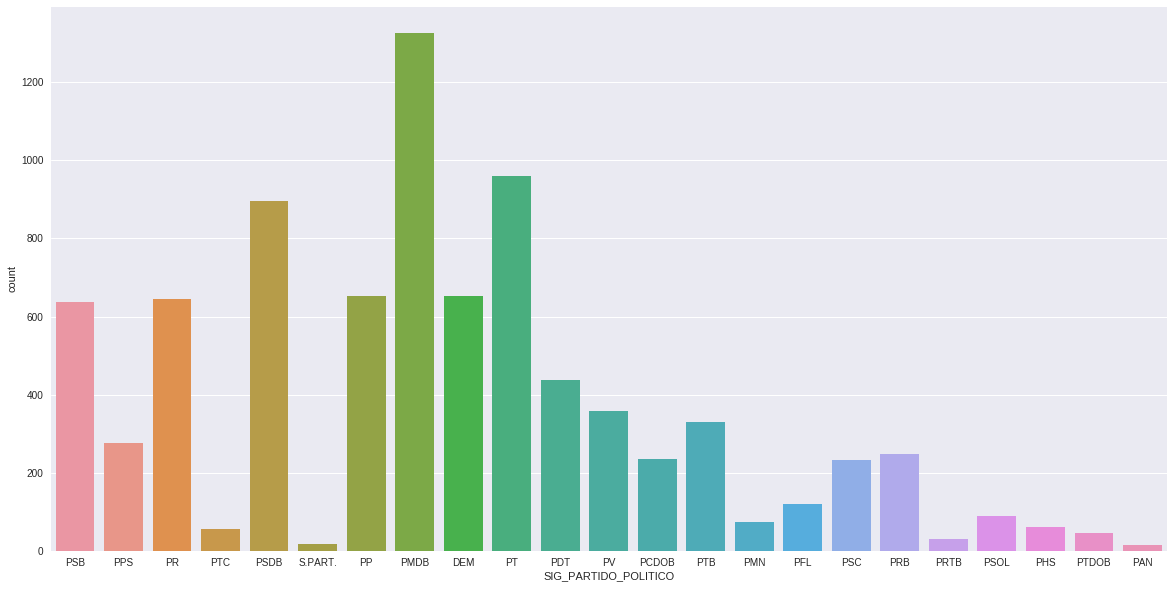

In [28]:
plt.rcParams['figure.figsize']=(20,10)
sns.countplot(data['SIG_PARTIDO_POLITICO'], label = "Quantidade")

#### Ranking dos 6 partidos com mais proposições e as respectivas quantidades:

In [47]:
pp_list = data['SIG_PARTIDO_POLITICO'].tolist()
pp_counter = {}

for pp in pp_list:
    if pp in pp_counter:
        pp_counter[pp] += 1
    else:
        pp_counter[pp] = 1
        
popular_pp = sorted(pp_counter, key = pp_counter.get, reverse = True)
top_7 = popular_pp[:7]

for pp in top_7:
    if type(pp) != float:
        print(pp + ': ' + str(pp_counter[pp]) + ' proposições')
    else:
        print('Sem informação de partido: ' + str(pp_counter[pp]) + ' proposições')

Sem informação de partido: 4389 proposições
PMDB: 1326 proposições
PT: 959 proposições
PSDB: 897 proposições
PP: 653 proposições
DEM: 652 proposições
PR: 645 proposições


#### Lista de todos os partidos e suas respectivas quantidades:

In [30]:
print(pp_counter)

{'PSB': 637, 'PPS': 276, 'PR': 645, 'PTC': 55, 'PSDB': 897, 'S.PART.': 17, 'PP': 653, 'PMDB': 1326, 'DEM': 652, 'PT': 959, 'PDT': 438, 'PV': 359, 'PCDOB': 235, 'PTB': 330, 'PMN': 75, 'PFL': 120, 'PSC': 233, 'PRB': 247, 'PRTB': 30, 'PSOL': 88, 'PHS': 61, nan: 4389, 'PTDOB': 45, 'PAN': 14}


#### Os 3 partidos com mais proposições vinculadas: PMDB com 1326, PT com 959 e PSDB com 897. 4389 das proposições não informam seus respectivos partidosde origem.

## Proposições x Nome do Parlamentar

#### Ranking dos 10 deputados com mais proposições:

In [48]:
name_list = data['NOM_PARLAMENTAR'].tolist()
name_counter = {}

for name in name_list:
    if name in name_counter:
        name_counter[name] += 1
    else:
        name_counter[name] = 1
        
popular_name = sorted(name_counter, key = name_counter.get, reverse = True)
top_10 = popular_name[:11]

for name in top_10:
    if type(name) != float:
        print(name + ': ' + str(name_counter[name]) + ' proposições')
    else:
        print('Sem informação do nome do deputado: ' + str(name_counter[name]) + ' proposições')

Sem informação do nome do deputado: 4319 proposições
CLEBER VERDE: 192 proposições
CARLOS BEZERRA: 186 proposições
DR. TALMIR: 122 proposições
VITAL DO RÊGO FILHO: 120 proposições
ANTONIO CARLOS MENDES THAME: 105 proposições
CARLOS SOUZA: 98 proposições
NEILTON MULIM: 81 proposições
DR. UBIALI: 79 proposições
ELIENE LIMA: 78 proposições
VALDIR COLATTO: 78 proposições


#### Média de proposições por deputado:

In [34]:
counter = 0
for name in name_counter:
    counter = counter + name_counter[name]
    
print("Média de proposições por candidato: %.2f" % ((counter-4319)/(len(name_counter)-1)))  # 4319 proposições sem nome do deputado (nan)

Média de proposições por candidato: 15.36


#### Lista com todos os deputados e a quantidade de proposições feitas por cada um durante todos os anos de mandato se encontra no arquivo *deputados&qnt_proposicoes_2006_2010.txt* dentro do diretório *deputados&qnt_proposicoes* neste mesmo repositório.